In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import os
from mtcnn.mtcnn import MTCNN

In [2]:
def relu(x):
    x = (int)(x)
    if x<0:
        return 0
    else:
        return x

In [3]:
def detect_faces(image, scaleFactor = 1.1):
    image_copy = image.copy()
    detector = MTCNN()
    faces_rect = detector.detect_faces(image_copy)
    rect = np.zeros([len(faces_rect),4],dtype=int)
    for i,face in enumerate(faces_rect):
        x,y,h,w = face['box']
        rect[i][0]= relu(x-5)
        rect[i][1]= relu(y-5)
        rect[i][2]=relu(h+15)
        rect[i][3]=relu(w+5)
    # gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    # faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)
    return rect

In [4]:
def predict(model,faces):

    dir_path = 'faces/unknown/'
    # for i,face in enumerate(faces):
    cv2.imwrite(dir_path+str(1)+'.jpeg',faces)

    data = keras.preprocessing.image.ImageDataGenerator()
    gen = data.flow_from_directory('faces',target_size=(120,90),color_mode='grayscale',shuffle=False,class_mode=None)
    x = gen.next()

    
    # result=[]
    # for i,image in enumerate(x):
    a = np.argmax(model.predict(x.reshape(1,120,90,1)))
        # result.append(a)

    for fil in os.listdir(dir_path):
        os.remove(os.path.join(dir_path,fil))

    return a

In [5]:
def extract_faces(image,pos):
    faces = []
    for (x,y,h,w) in pos:
        # x,y,h,w = ce indices must be integers or None or have an p
        face = image[y:y+h,x:x+w,:]
        faces.append(face)
    return faces

In [6]:
def show_image(img,positions,gender):
    image_copy = img.copy()
    for i,(x, y, h, w) in enumerate(positions):
        if gender[i]==0:
            color = (255,0,0)
        else:
            color = (0,255,0)
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), color, 2)
    print('Number of people: ',len(gender))
    H,W,c = img.shape
    plt.figure(figsize=(H/20,W/20))    
    plt.imshow(cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    print("keys:")
    print("Blue box = female")
    print("green box = male")
    print()

In [7]:
def result(image_path):
    img = cv2.imread(image_path)
    positions = detect_faces(img)
    faces = extract_faces(img,positions)
    gender = []
    for face in faces:
        g = predict(model,face)
        gender.append(g)
    show_image(img,positions,gender)

In [8]:
 model = keras.models.load_model('gender_classification_model')

Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  3


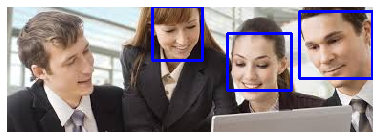

keys:
Blue box = female
green box = male

Found 1 images belonging to 1 classes.
Number of people:  1


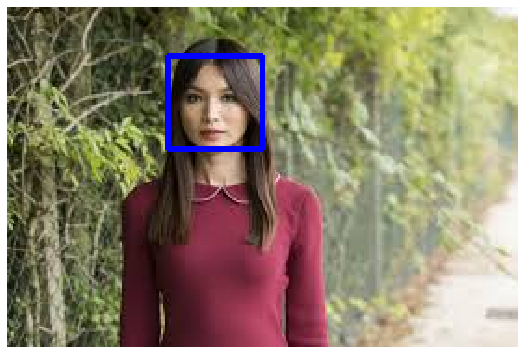

keys:
Blue box = female
green box = male

Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  4


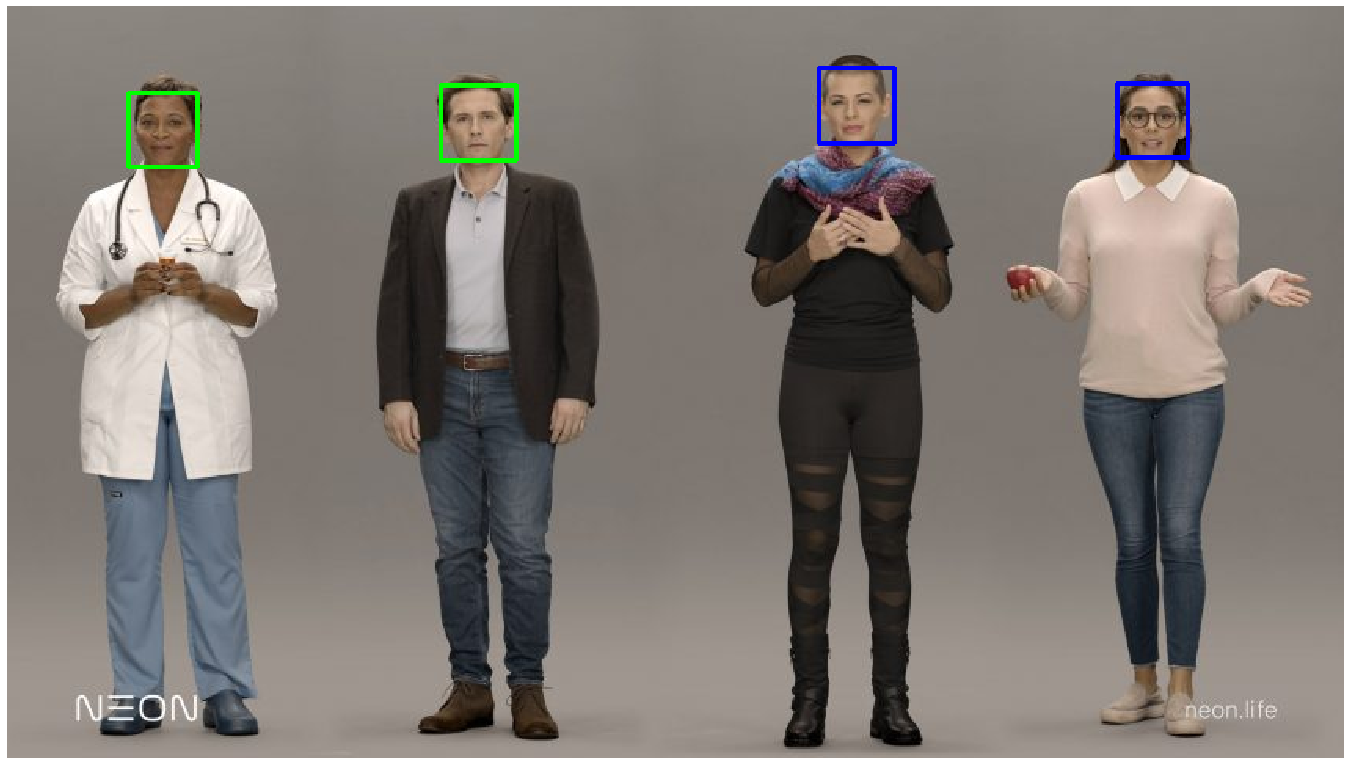

keys:
Blue box = female
green box = male

Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  2


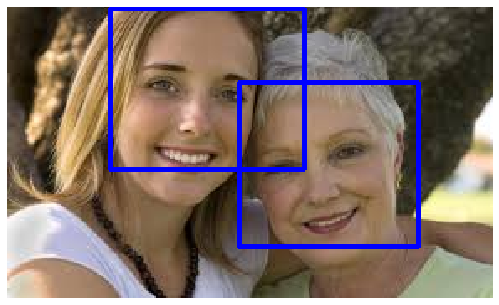

keys:
Blue box = female
green box = male

Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  6


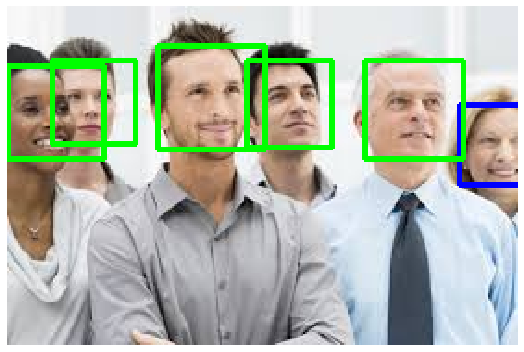

keys:
Blue box = female
green box = male

Found 1 images belonging to 1 classes.
Number of people:  1


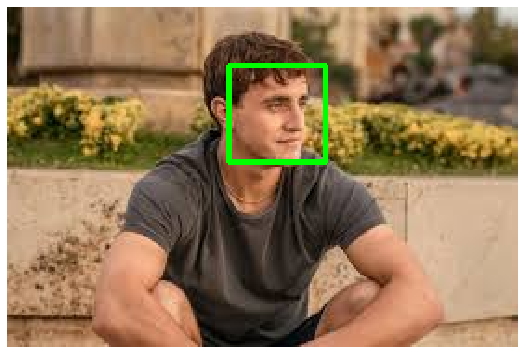

keys:
Blue box = female
green box = male

Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  4


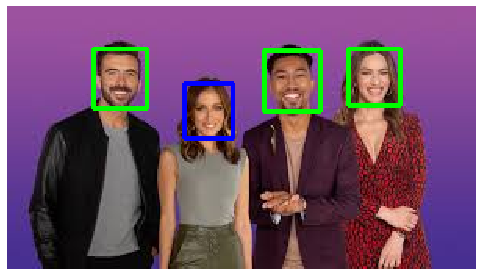

keys:
Blue box = female
green box = male

Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  2


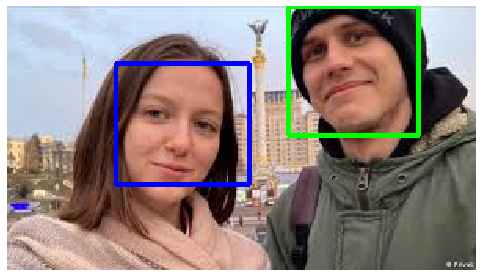

keys:
Blue box = female
green box = male

Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  2


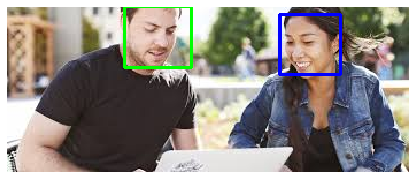

keys:
Blue box = female
green box = male

Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  4


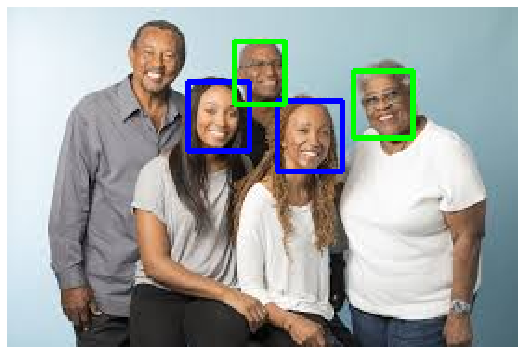

keys:
Blue box = female
green box = male

Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  3


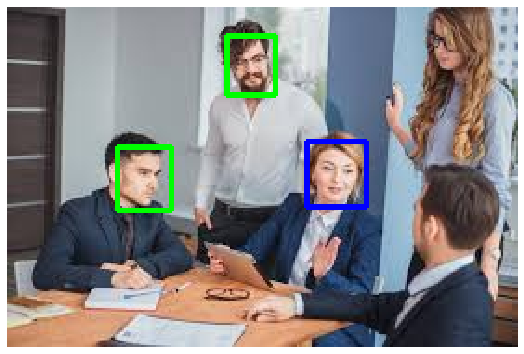

keys:
Blue box = female
green box = male

Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  6


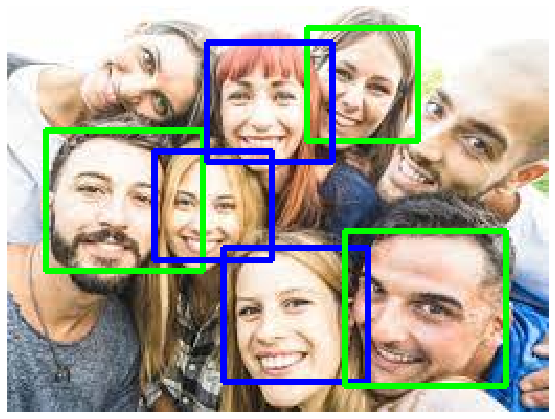

keys:
Blue box = female
green box = male

Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  2


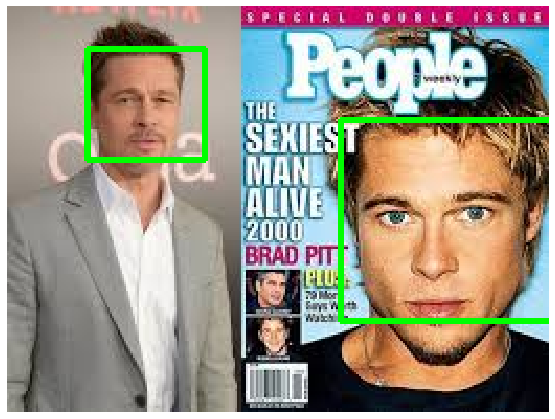

keys:
Blue box = female
green box = male

Found 1 images belonging to 1 classes.
Number of people:  1


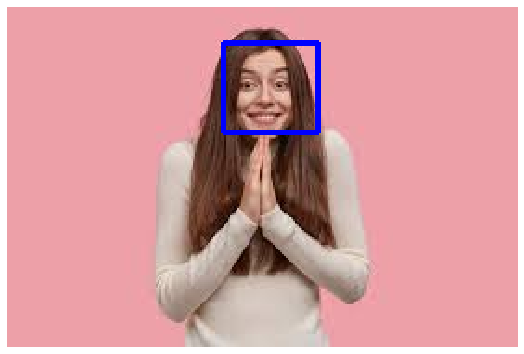

keys:
Blue box = female
green box = male

Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  3


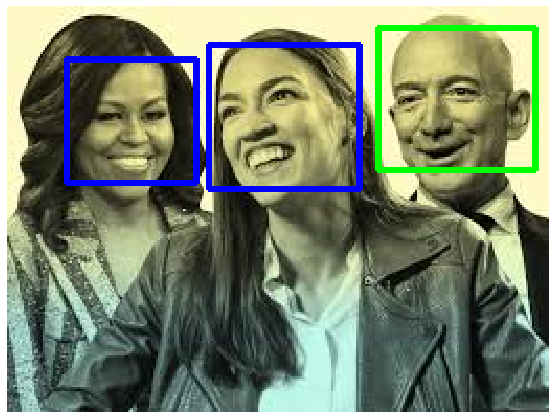

keys:
Blue box = female
green box = male

Found 1 images belonging to 1 classes.
Number of people:  1


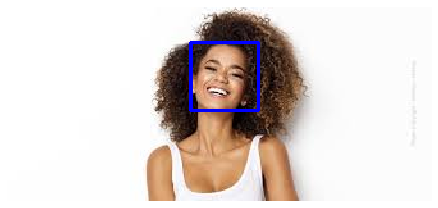

keys:
Blue box = female
green box = male

Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  10


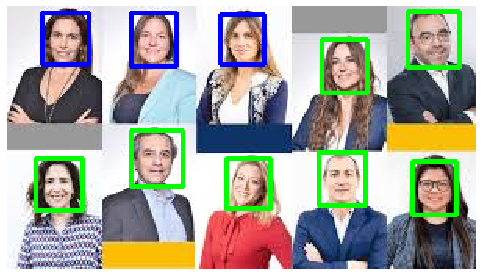

keys:
Blue box = female
green box = male

Found 1 images belonging to 1 classes.
Number of people:  1


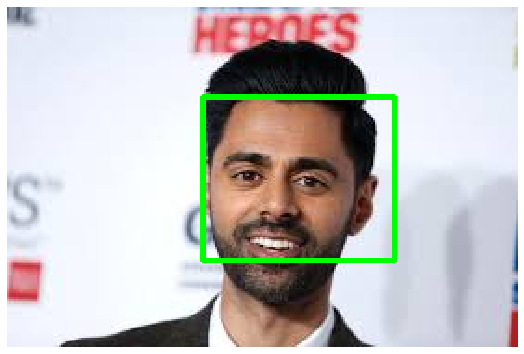

keys:
Blue box = female
green box = male



In [9]:
dirc = 'test_images/'
for image in os.listdir(dirc):
    # print(image)
    result(os.path.join(dirc,image))